# 백색 잡음

'''백색잡음(白色雜音) 또는 화이트 노이즈(영어: white noise)은 물리적으로 전도체 내부에 있는 이산적인 전자의 자유 운동으로부터 야기되는 잡음으로, 처음으로 이것을 구분하고 특징을 규명한 사람의 이름을 따서 존슨 노이즈(Johnson Noise)라고도 한다.
전도체 내부의 전자들의 열에 따른 불규칙한 움직임, 즉 열교란에 의한 내부로부터의 잡음이다. 이 잡음은 모든 형태의 전자 장비와 매체에서 나타나며, 그 크기는 절대 온도에 비례한다. 모든 범위의 주파수에 대해 균일한 전력스펙트럼을 가지고 있다.
열잡음은 "흰빛"과 같은 형태의 주파수 스펙트럼을 가지므로 화이트 노이즈(하얀 잡음)이라고 불리며, 패턴이 무작위하기 때문에 랜덤 노이즈라고도 불린다. 화이트 노이즈는 제거될 수 없는 잡음이며 이 잡음을 고려하여 계산한 이론적으로 가능한 전송매체의 최대 용량을 구할 수 있다.'''

시계열 분석을 구성하는 여러가지 기본 모형 중 가장 중요한 것이 바로 **백색 잡음(white noise)**이다. 

백색 잡음 $e$은 확률 과정을 구성하는 모든 개별 확률 변수 $e_t$들이 서로 독립이고(independent) 동일한 확률 분포를 따르는(identically distributed) 확률 과정을 말한다. 이러한 가정을 약자로 $i.i.d$ 가정이라고 한다. 백색 잡음의 기반이 되는 확률 변수의 분포가 반드시 정규 분포일 필요는 없다.

$$ e_t \sim i.i.d \;\; \text{ for all } t$$

백색 잡음은 다음과 같은 특성을 만족한다.

* 정상 과정(stictly stationary process)이다.
* 백색잡음은 차수가 올라가도 자기상관계수가 0이어야한다( 차수가 앞인 백색잡음은 뒤의 백색잡음과 관련이 없어야함.. 예측불가능한 가우시안 백색잡음) 

* 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0이다.
$$ \gamma_l = \begin{cases} \text{Var}[e_t] & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$

* 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0이다.
$$ \rho_l = \begin{cases} 1 & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases} $$


## 가우시안 백색 잡음

확률 분포가 표준 가우시안 정규 분포인 백색 잡음을 가우시안 백색 잡음(Gaussina white noise)라고 한다. 

$$ e_t \sim i.i.d \; N(\mu, \sigma^2) \;\; \text{ for all } t$$


가우시안 백색 잡음은 다음과 같이 시뮬레이션 할 수 있다.

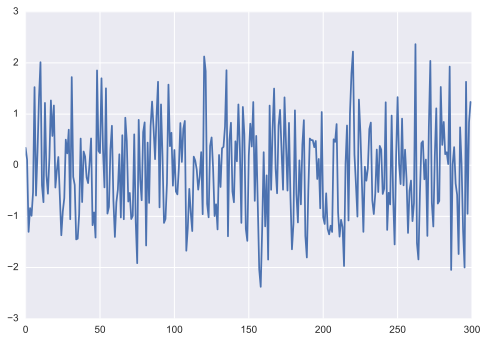

In [4]:
e = sp.stats.norm.rvs(size=300)
plt.plot(e);

## 비-가우시안 백색 잡음

앞서 밝혔지만 백색 잡음을 이루는 기반 확률 분포가 반드시 정규 분포일 필요는 없다. 예를 들어 가장 단순한 경우로서 $\{1, -1\}$로 구성되고 1이 나올 확률 $p=0.5$인  베르누이 확률 과정도 백색 잡음이 된다.

(-1.1, 1.1)

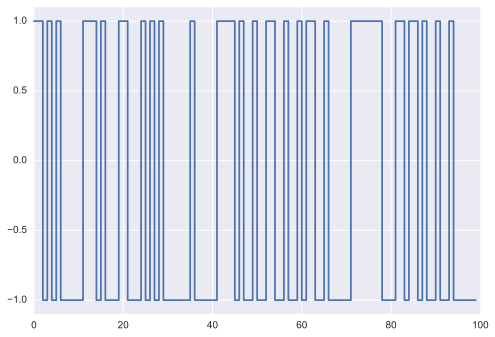

In [10]:
e = sp.stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(e)), e)
plt.ylim(-1.1, 1.1)

## 백색 잡음의 스펙트럼

백색 잡음에 대한 파워 스펙트럼을 구하면 이론적으로는 평평한(flat) 형태가 된다. 시계열의 파워 스펙트럼을 평평하게 만드는 필터를 적용하는 것을 **백색화(whitening)**라고도 한다.

(0.05, 1000.0)

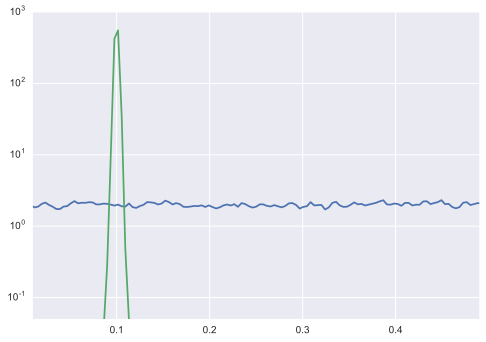

In [37]:
import scipy.signal
sp.random.seed(0)
N = 2**15
e = sp.stats.bernoulli.rvs(0.5, size=N) * 2 - 1

f1, P1 = sp.signal.welch(e)
plt.semilogy(f1, P1);

# 비교를 위한 단일 주파수 신호 (mono tone)
fs = 10e3; N = 1e5; amp = 2*np.sqrt(2); freq = 1000; noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
s = amp*np.sin(2*np.pi*freq*time)

f2, P2 = sp.signal.welch(s)
plt.semilogy(f2, P2);
plt.xlim([0.01, 0.49])
plt.ylim([0.5e-1, 1e3])